In [20]:
import warnings
warnings.filterwarnings("ignore")

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('haberman.csv')
df.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [123]:
# (Q) How many features and datapoints?
print(df.shape)

(306, 4)


<strong>Observation(s): </strong>
1. Number of datapoints : 306
2. Number of features : 4

In [124]:
# (Q) What are the column names in our dataset?
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


**Observation :** 
<p> There are no missing values </p>


In [126]:
# (Q)How many datapoints for each class are present?
df['status'].value_counts(normalize=1)
#Imbalanced data as the number of data points for each class is not the same

1    0.735294
2    0.264706
Name: status, dtype: float64

**Observation :** 
<p>73% of the patients survived 5 years or longer</p>
<p>26.4% of the patients died within 5 years.</p>

In [127]:

df['status']=df['status'].map({1:'SURVIVED',2:'NOT-SURVIVED'})
df_negative = df.loc[df["status"] == 'SURVIVED']
df_positive = df.loc[df['status']=='NOT-SURVIVED']
#df_positive contains the info of survived patients
#df_negative contains the info of NON-survived patients


# 2-D Scatter Plot

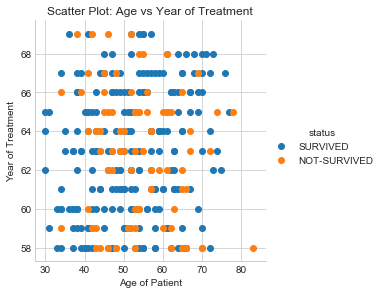

In [129]:
#2-D Scatter plot with color-coding for each class (survived or NOT)
sns.set_style('whitegrid');
sns.FacetGrid(df,hue="status",size=4) \
  .map(plt.scatter,"age","year") \
  .add_legend();
plt.xlabel('Age of Patient')
plt.ylabel('Year of Treatment')
plt.title('Scatter Plot: Age vs Year of Treatment')
plt.show();

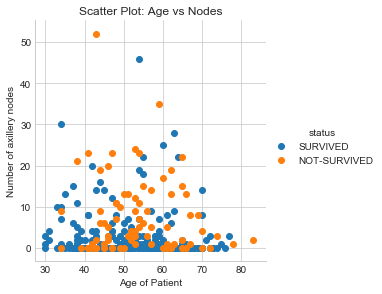

In [130]:
sns.set_style('whitegrid');
sns.FacetGrid(df,hue="status",size=4) \
  .map(plt.scatter,"age","nodes") \
  .add_legend();
plt.ylabel('Number of axillery nodes')
plt.xlabel('Age of Patient')
plt.title('Scatter Plot: Age vs Nodes')
plt.show();

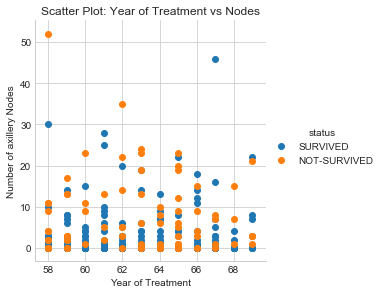

In [131]:
sns.set_style('whitegrid');
sns.FacetGrid(df,hue="status",size=4) \
  .map(plt.scatter,"year","nodes") \
  .add_legend();
plt.ylabel('Number of axillery Nodes')
plt.xlabel('Year of Treatment')
plt.title('Scatter Plot: Year of Treatment vs Nodes')
plt.show();

# Pair-Plot

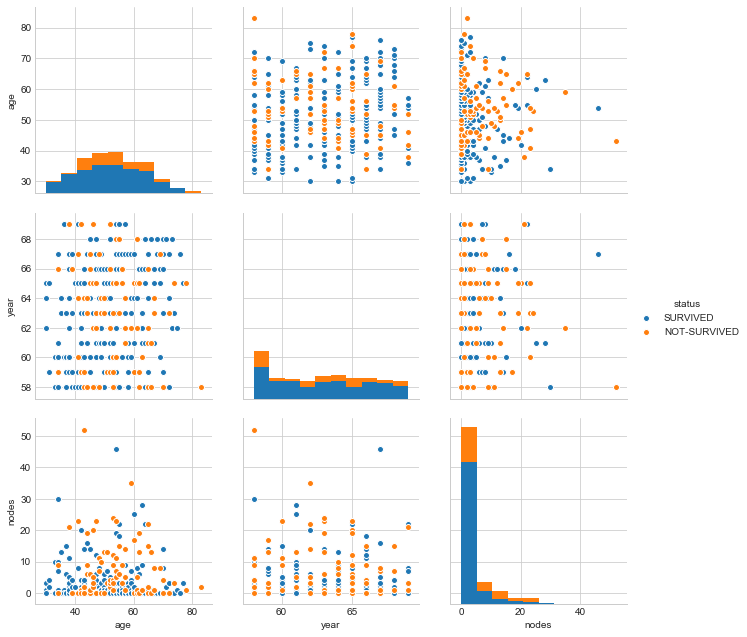

In [132]:
#Pair-scatterplot for the features:[age,year,nodes]
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", size=3);
plt.show();

**Observation(s):**
 <p>Nodes and the year of treatment taken together slightly offers better seperation of the classes than other scatterplots </p>
 <p>Taking any combinations of pairs of features like (age,year) or (year,nodes),we cannot distinguish patient survived or not due to considerable overlap. </p>


# Histogram,PDF and CDF

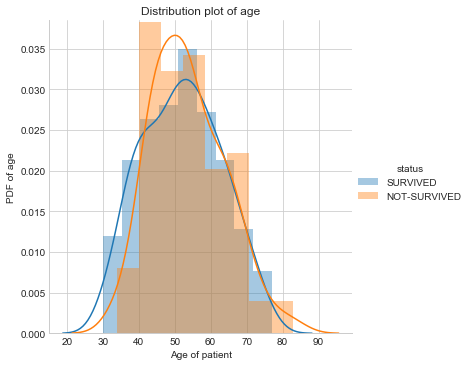

In [133]:
#1-D distplot of age
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.xlabel('Age of patient')
plt.ylabel('PDF of age')
plt.title('Distribution plot of age')
plt.show();

**Observation(s) :**
<p> Many points from the different age distribution of survived and NON survived patiends are overlapping</p>

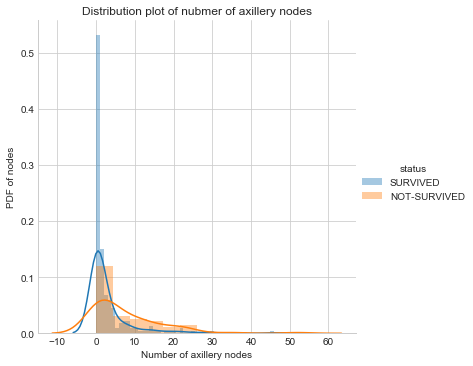

In [134]:
#1-D distplot of nodes
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.xlabel('Number of axillery nodes')
plt.ylabel('PDF of nodes')
plt.title('Distribution plot of nubmer of axillery nodes')
plt.show();

**Observation(s) :**
<p> Many survived patients have around  0  axillery nodes and NON survived patients have around 2-3 nodes</p>
<p>NON survived patients have some outliers that causes long tails </p>
<p>Majority of the patients have 0-5 axillery nodes

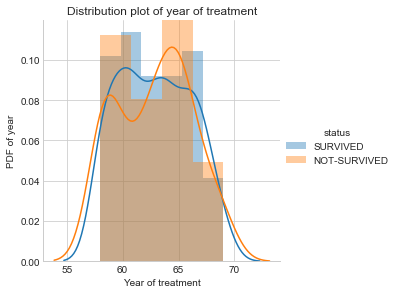

In [135]:
#1-D distplot of year
sns.FacetGrid(df, hue="status", size=4) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.xlabel('Year of treatment')
plt.ylabel('PDF of year')
plt.title('Distribution plot of year of treatment')
plt.show();

**Observation(s) :**
<p> From PDFs of age,nodes and year of treatment, number of nodes seem to be the useful feature for classiying whether patient survived or not</p>

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


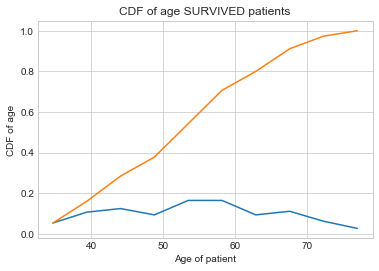

In [136]:
#Survived -Age of Patient CDF
counts, bin_edges = np.histogram(df_negative['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_negative['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.xlabel('Age of patient')
plt.ylabel('CDF of age')
plt.title('CDF of age SURVIVED patients')
plt.show();

**Observation(s) :**
<p> 80% of the patients who survived have age <= 67 </p>

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


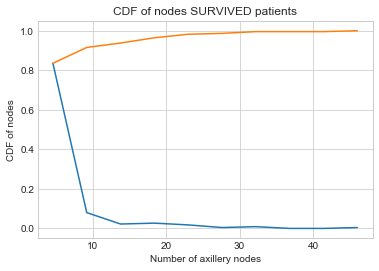

In [137]:
#Survived -No. of axillery nodes CDF
counts, bin_edges = np.histogram(df_negative['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_negative['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.xlabel('Number of axillery nodes')
plt.ylabel('CDF of nodes')
plt.title('CDF of nodes SURVIVED patients')
plt.show();

**Observation(s) :**
<p> 80% of the patients who survived have at most 5 nodes </p>

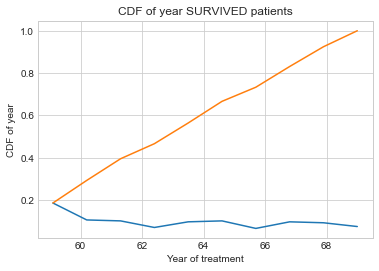

In [146]:
#Survived -YEAR of Treatment CDF
counts, bin_edges = np.histogram(df_negative['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_negative['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.xlabel('Year of treatment')
plt.ylabel('CDF of year')
plt.title('CDF of year SURVIVED patients')
plt.show();

**Observation(s) :**
<p> 80% of the patients who SURVIVED have at most age 67</p>

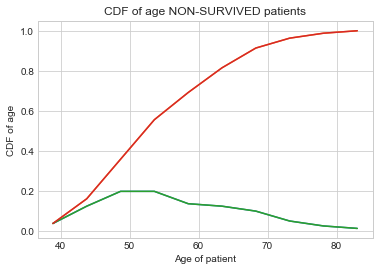

In [145]:
# Not Survived - Age CDF

counts, bin_edges = np.histogram(df_positive['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_positive['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age of patient')
plt.ylabel('CDF of age')
plt.title('CDF of age NON-SURVIVED patients');
plt.show();

**Observation(s) :**
<p> 80% of the patients who did NOT survive have age < 63</p>

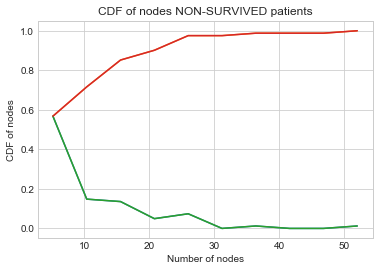

In [144]:
# Not Survived - No. of axillery nodes CDF
counts, bin_edges = np.histogram(df_positive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_positive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Number of nodes')
plt.ylabel('CDF of nodes')
plt.title('CDF of nodes NON-SURVIVED patients')
plt.show();

**Observation(s) :**
<p> 60% of the patients who did NOT survive had at most 5 nodes</p>

# Mean, Variance and Std-dev

---



In [147]:
#Mean, Variance, Std-deviation,  
print("Means :")
print(np.mean(df_positive["nodes"])) #Mean of no. axillery nodes of NON-SURVIVED patients
print(np.mean(df_negative["nodes"])) #Mean of no. axillery nodes of SURVIVED patients

print("\nStd-dev:");
print(np.std(df_positive["nodes"])) #STD of no. axillery nodes of NON-SURVIVED patients
print(np.std(df_negative["nodes"])) #STD of no. axillery nodes of SURVIVED patients




Means :
7.45679012345679
2.7911111111111113

Std-dev:
9.128776076761632
5.857258449412131


In [ ]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [151]:
#Median, Quantiles, Percentiles, IQR for year of treatment
print("\nMedians:")
print('MEDIAN of year of treatment of NON-SURVIVED patients is {}'.format(np.median(df_positive["year"])))
print('MEDIAN of year of treatment of SURVIVED patients is {}'.format(np.median(df_negative["year"]))) 


print("\nQuantiles:")
print('(0,25,50,75)percentiles of year for NON-SURVIVED patients: ')
print(np.percentile(df_positive["year"],np.arange(0, 100, 25))) 
print(' (0,25,50,75)percentiles of year for SURVIVED patients')
print(np.percentile(df_negative["year"],np.arange(0, 100, 25))) 

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df_positive["year"])) #MAD of year of treatment of NON-SURVIVED patients
print(robust.mad(df_negative["year"])) #MAD of year of treatment of SURVIVED patients



Medians:
MEDIAN of year of treatment of NON-SURVIVED patients is 63.0
MEDIAN of year of treatment of SURVIVED patients is 63.0

Quantiles:
(0,25,50,75)percentiles of year for NON-SURVIVED patients: 
[58. 59. 63. 65.]
 (0,25,50,75)percentiles of year for SURVIVED patients
[58. 60. 63. 66.]

Median Absolute Deviation
4.447806655516806
4.447806655516806


**Observation(s):**
Median of year of treatment are same 63.0 for survived and NON-survived,indicating overlapping distributions and hence it is not a good feature for classification

In [152]:
#Median, Quantiles, Percentiles, IQR for age
print("\nMedians:")
print('MEDIAN of age of NON-SURVIVED patients is {}'.format(np.median(df_positive["age"])))
print('MEDIAN of age of SURVIVED patients is {}'.format(np.median(df_negative["age"])))


print("\nQuantiles:")
print('(0,25,50,75)percentiles of age for NON-SURVIVED patients: ')
print(np.percentile(df_positive["age"],np.arange(0, 100, 25)))
print(' (0,25,50,75)percentiles of age for SURVIVED patients')
print(np.percentile(df_negative["age"],np.arange(0, 100, 25)))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df_positive["age"]))
print(robust.mad(df_negative["age"]))



Medians:
MEDIAN of age of NON-SURVIVED patients is 53.0
MEDIAN of age of SURVIVED patients is 52.0

Quantiles:
(0,25,50,75)percentiles of age for NON-SURVIVED patients: 
[34. 46. 53. 61.]
 (0,25,50,75)percentiles of age for SURVIVED patients
[30. 43. 52. 60.]

Median Absolute Deviation
11.860817748044816
13.343419966550417


**Observation(s):**
Median of ages are around same 52.0 for both survived and NON-survived,indicating overlapping distributions and hence it is not a good feature for classification


In [153]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print('MEDIAN of nodes of NON-SURVIVED patients is {}'.format(np.median(df_positive["nodes"])))
print('MEDIAN of nodes of SURVIVED patients is {}'.format(np.median(df_negative["nodes"])))


print("\nQuantiles:")
print('(0,25,50,75)percentiles of nodes for NON-SURVIVED patients: ')
print(np.percentile(df_positive["nodes"],np.arange(0, 100, 25)))
print('(0,25,50,75)percentiles of nodes for SURVIVED patients: ')
print(np.percentile(df_negative["nodes"],np.arange(0, 100, 25)))



from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df_positive["nodes"]))
print(robust.mad(df_negative["nodes"]))



Medians:
MEDIAN of nodes of NON-SURVIVED patients is 4.0
MEDIAN of nodes of SURVIVED patients is 0.0

Quantiles:
(0,25,50,75)percentiles of nodes for NON-SURVIVED patients: 
[ 0.  1.  4. 11.]
(0,25,50,75)percentiles of nodes for SURVIVED patients: 
[0. 0. 0. 3.]

Median Absolute Deviation
5.930408874022408
0.0


**Observation(s):**
<p>1.75% of the survived patients had 0 axillery nodes. Remaining 25% survived patients had atleast 3 nodes.</p>
<p>2.50% of the NON survived patients had at most 3 axillery nodes.



# Box plot and Whiskers

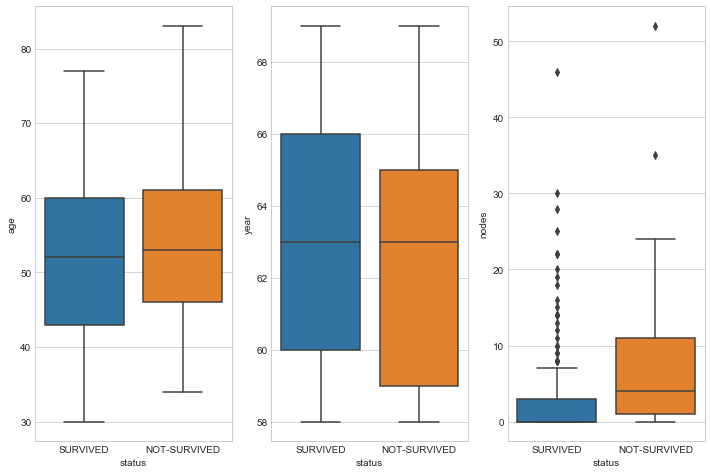

In [155]:
#Boxplot to detect outliers and see quantiles for all features
fig,axes = plt.subplots(1,3,figsize=(12,8))
for idx,feature in enumerate(list(df.columns)[:-1]):
  sns.boxplot(x='status',y=feature,data=df,ax=axes[idx])
plt.show()

**Observation(s):**
<p>Survived patients have many outliers
<p>NON survived patients have less outliers

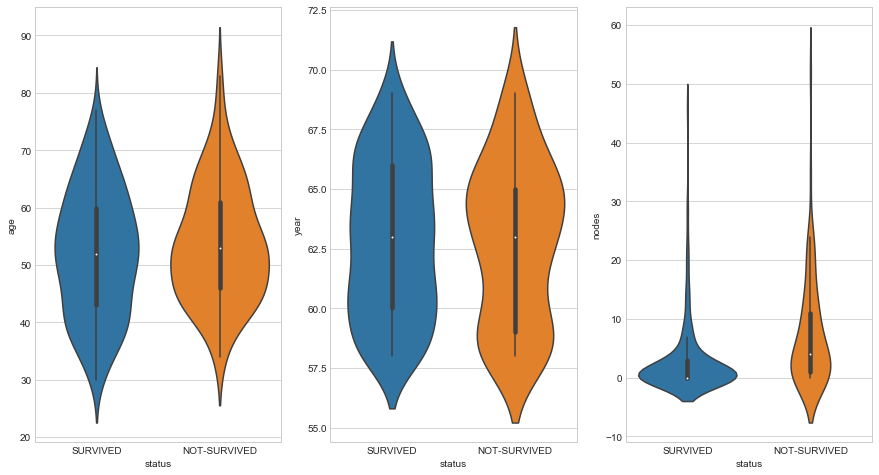

In [157]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

fig,axes = plt.subplots(1,3,figsize=(15,8))
for idx,feature in enumerate(list(df.columns)[:-1]):
  sns.violinplot(x='status',y=feature,data=df,ax=axes[idx])
plt.show()

**Observation(s):**
<p>Patients of age between 43 to 60 have the maximum survival rate after 5 years.</p>
<p>Majority of patients have 0-2 nodes<p>
